In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
comments=pd.read_csv(r'C:\Users\Administrator\Documents\Data Analytics Real World Project -Python\1-Youtube Text Data Analysis\GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [33]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

Installing text blob library

In [34]:
!pip install textblob

In [36]:
from textblob import TextBlob

In [37]:
#Checking for Polarity

In [38]:
TextBlob(' Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [39]:
#checking for null columns

In [40]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [41]:
#dropping NA

In [42]:
comments.dropna(inplace=True)

Finding sentiment polarity of whole dataset

In [43]:
polarity=[]

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [44]:
#Adding polarity to the Dataset

In [45]:
comments['Polarity']=polarity

In [46]:
comments.head(10)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9  jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   

   replies  Polarity  
0        0  0.450000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  1.000000  
5        0  0.300000  
6        0  0.000000  
7        0 -0.100000  
8        0  0.028571  
9        0  0.500000

Creating a Filter to find positive polarity And perform EDA.

In [48]:
comments_positive=comments[comments['Polarity']==1]

In [49]:
comments_positive.head(20)

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   
202  T_PuZBdT2iM  Power is the disease.  Care is the cure.  Keep...      0   
206  T_PuZBdT2iM  WHY DO I KEEP FREAKING LAUGHING EACH TIME I WA...      0   
237  T_PuZBdT2iM  LIKE = MEET CELEBRITY \nSUBSCRIBE = BECOME A B...      0   
243  T_PuZBdT2iM                    the sonic air timer was perfect      0   
283  T_PuZBdT2iM                       no 16 on trending impressive      1   
306  NsjsmgmbCfc                      My daughters name is lacey <3      0   
332  NsjsmgmbCfc  I'm 17 and can proudly say Moon Dreamers was o...      0   
607  LcZ2AuvxXNA  if I could subscribe to Dude Perfect a million...      1   
609  LcZ2AuvxXNA           You guys should make dude perfect sceets      0   
644  LcZ2AuvxXNA  To be a dude perfect member it is so awesome ....      0   
649  LcZ2AuvxXNA  Dude Perfect should do a collab with the slo m...      0   
658  LcZ2AuvxXNA                  the cody trust stort is excellent      0   
676  LcZ2AuvxXNA                                            awesome      0   
715  lamseWekh8Y           your tummy!!!!!! I'm in love!!!!!! xxxxx      0   
726  lamseWekh8Y  A lot of youtubers don't vlog anymore if it is...      0   

     replies  Polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0  
202        0       1.0  
206        0       1.0  
237        0       1.0  
243        0       1.0  
283        0       1.0  
306        0       1.0  
332        0       1.0  
607        0       1.0  
609        0       1.0  
644        0       1.0  
649        0       1.0  
658        0       1.0  
676        0       1.0  
715        0       1.0  
726        0       1.0

In [50]:
#Installing the WordCloud library

In [51]:
!pip install wordcloud

In [54]:
from wordcloud import WordCloud,STOPWORDS

In [55]:
stopwords=set(STOPWORDS)

In [60]:
total_comments=''.join(comments_positive['comment_text'])

In [61]:
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.The best thing to ever happen to iPhoneApple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4das a lot of edditing you have done there ... I like it :DWelcome to the Scandiworld!Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!the sonic air timer was perfectno 16 on trending impressiveMy daughters name is lacey <3I'm 17 and can proudly say Moon Dreamers was one of my favourite shows!if I could subscribe to Dude Perfect a million times I wouldYou guys should make dude perfect sceetsTo be a dude perfect member it is so awesome ....Dude Perfect sh

Generating a WordCloud

In [62]:
wordcloud= WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

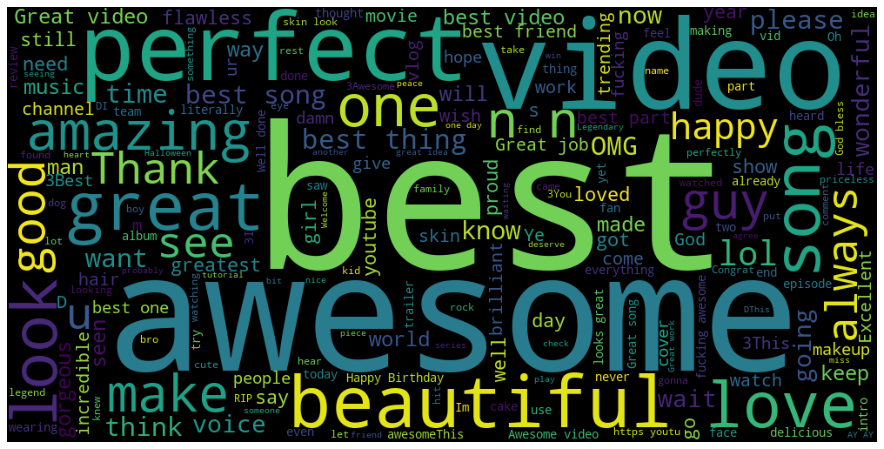

In [64]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')

In [65]:
#Generating the wordcloud for negative sentences 

In [70]:
comments_negative=comments[comments['Polarity']==-1]

In [71]:
comments_negative.head()

video_id                                       comment_text  likes  \
1387  ql0Op1VcELw                                             boring      0   
1394  ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530  -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745  F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793  F2uJvwiSZAQ                                      Thats insane.      0   

      replies  Polarity  
1387        0      -1.0  
1394        1      -1.0  
1530        0      -1.0  
1745        0      -1.0  
1793        0      -1.0

In [72]:
total_negative=''.join(comments_negative['comment_text'])

In [73]:
total_negative

"boring0:22   **laughs at terrible pun**this is the worst thing i've heard. ever.People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect.Thats insane.How is this trending ? AwfulButthurt Sean, idiot!Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!!Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everythingPlease let this die, you can tell the actors are miserable.can't wait :'(Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nastyHandmaids Tale was boring, I foundI won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic!all the products are horriblejim carrey lost it, became a boring socialist hippyWinner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons.Terrible, at times like this we need to come together not stealYour style is

In [74]:
wordcloud_negative=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_negative)

(-0.5, 999.5, 499.5, -0.5)

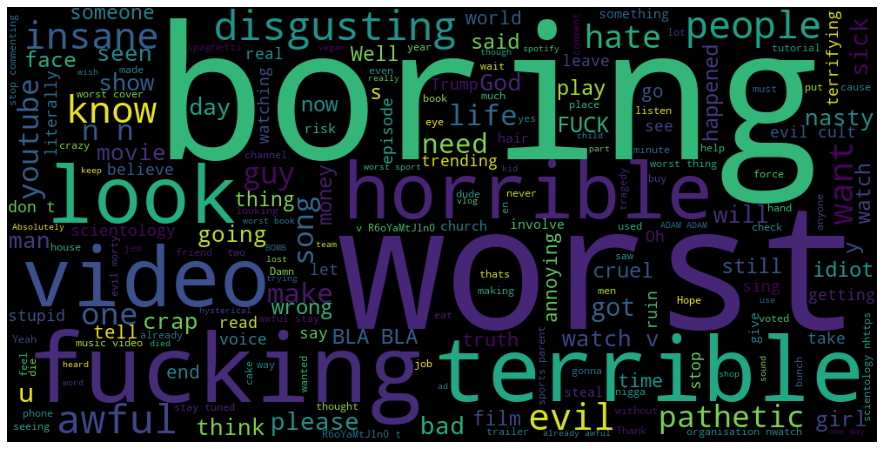

In [77]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud_negative)
plt.axis('off')

# Analyzing tags ,columns trending on youtube

In [81]:
videos=pd.read_csv(r'C:\Users\Administrator\Documents\Data Analytics Real World Project -Python\1-Youtube Text Data Analysis\USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [82]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [85]:
tags_complete=''.join(videos['tags'])

In [86]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 lifeApple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone[none]apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|vergejacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emojia24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar winne

In [87]:
import re

In [90]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [91]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   lifeApple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge vergejacksfilms parody parodies iphone iphone x iphone   apple emojia   a   films a   trailers independent films trailer HD official movie film a   movies oscar winne

In [92]:
tags=re.sub(' +',' ',tags)

In [93]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang lifeApple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge vergejacksfilms parody parodies iphone iphone x iphone apple emojia a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster Arti

In [94]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

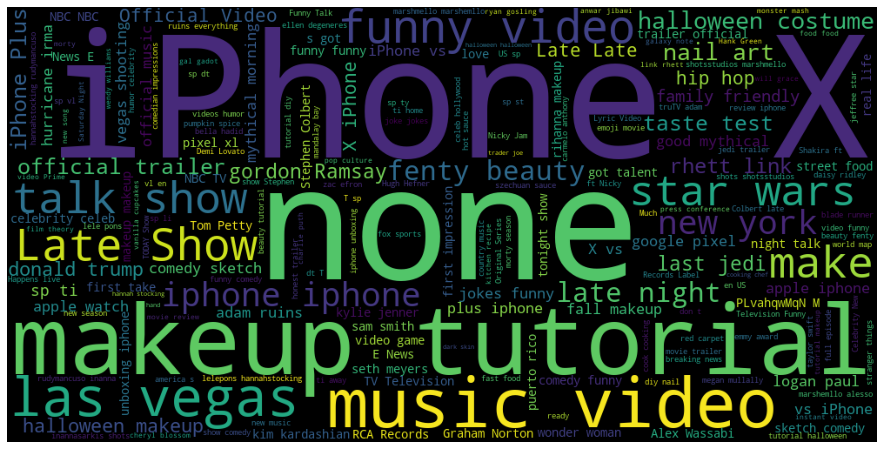

In [96]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')

# Views, Likes and Dislikes analysis

Text(0.5, 1.0, 'Views and Likes')

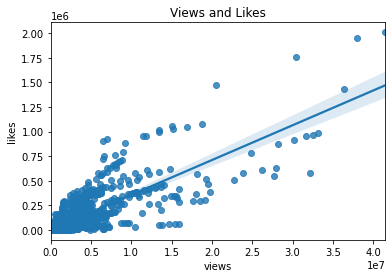

In [99]:
sns.regplot(data=videos,x='views',y='likes')
plt.title("Views and Likes")

Text(0.5, 1.0, 'Views and Dislikes')

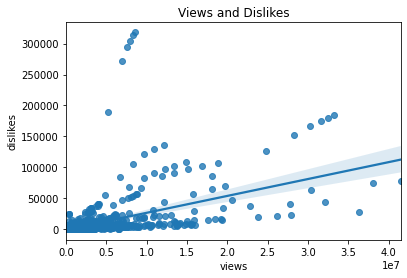

In [101]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title("Views and Dislikes")

In [102]:
df_corr=videos[['views','likes','dislikes']]
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

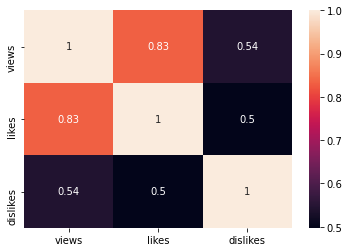

In [103]:
sns.heatmap(df_corr.corr(),annot=True)